# Pymaceuticals Inc.
---

### Analysis

- Capolmulin and Ramicane appear to be the most popularly tested drugs when compared to all others tested. 

- When looking at tumor volume vs. time point for the mouse treated with Capomulin on the line plot, there is a noticeable decrease in tumor size (volume) as time goes on (timepoint). 

- Additionally, when looking at the scatter plot of the average tumor volume vs. mouse weight, we see that tumor volume remains higher in heavier mice. 

- Based on our correlation calculation of 0.84, we can pretty confidently say that average tumor volume and mouse weight are strongly correlated, as revealed through the linear (uphill) relationship on the scatter plot.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combinedDF = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
combinedDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
miceCount = combinedDF["Mouse ID"].unique()
numMice = len(miceCount)
numMice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMouseID = combinedDF.loc[combinedDF.duplicated(subset = ["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicateMouseID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
allData = combinedDF.loc[combinedDF["Mouse ID"] == "g989", :]
allData

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanDF = combinedDF[combinedDF["Mouse ID"].isin(duplicateMouseID) == False]
cleanDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
cleanDFMice = cleanDF["Mouse ID"].unique()
numMiceClean = len(cleanDFMice)
numMiceClean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = cleanDF["Tumor Volume (mm3)"].groupby(cleanDF["Drug Regimen"]).mean()
median = cleanDF["Tumor Volume (mm3)"].groupby(cleanDF["Drug Regimen"]).median()
variance = cleanDF["Tumor Volume (mm3)"].groupby(cleanDF["Drug Regimen"]).var()
stdDev = cleanDF["Tumor Volume (mm3)"].groupby(cleanDF["Drug Regimen"]).std()
stdErr = cleanDF["Tumor Volume (mm3)"].groupby(cleanDF["Drug Regimen"]).sem()

# Assemble the resulting series into a single summary DataFrame.
summaryStats = pd.DataFrame ({'Mean Tumor Volume': mean,
                             'Median Tumor Voume': median, 
                             'Tumor Volume Variance': variance,
                             'Tumor Volume Std. Dev.': stdDev,
                             'Tumor Volume Std. Err.': stdErr})
summaryStats


,Mean Tumor Volume,Median Tumor Voume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
summaryTable = cleanDF.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
summaryTable

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

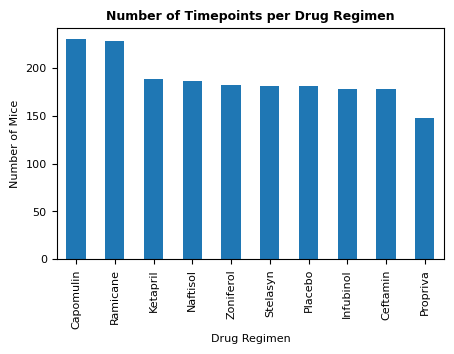

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
barPandas = cleanDF["Drug Regimen"].value_counts().plot.bar(figsize = (5, 3), fontsize = 8)
plt.title("Number of Timepoints per Drug Regimen", fontsize = 9, fontweight = "bold")
plt.xlabel("Drug Regimen", fontsize = 8)
plt.ylabel("Number of Mice", fontsize = 8)
barPandas
plt.show()

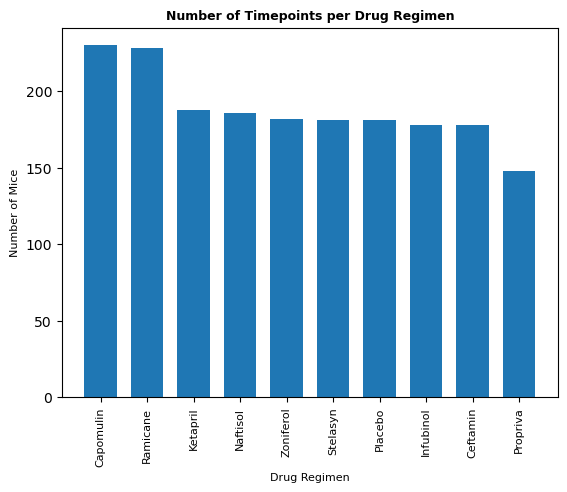

In [10]:
# Calculate # of data points for each drug regimen
drugCount = cleanDF["Drug Regimen"].value_counts()

# Set x-axis to length of drug count series
xAxis = np.arange(len(drugCount))

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
barPyplot = plt.bar(xAxis, drugCount, width = 0.7)
plt.title("Number of Timepoints per Drug Regimen", fontsize = 9, fontweight = "bold")
plt.xlabel("Drug Regimen", fontsize = 8)
plt.ylabel("Number of Mice", fontsize = 8)

# Label tick marks
ticks = [value for value in xAxis]
plt.xticks(ticks, drugCount.index.values, rotation = "vertical", fontsize = 8)

# Display plot
plt.show()

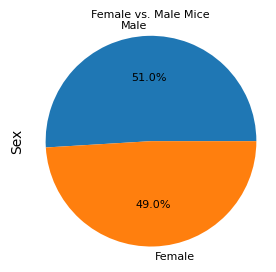

In [11]:
# Get count of "sex" column
genderCount = cleanDF["Sex"].value_counts()
plt.title ("Female vs. Male Mice", fontsize = 8)

# Generate a pie plot showing the distribution of female versus male mice using Pandas
genderCount.plot.pie(autopct="%1.1f%%", figsize = (3, 3), fontsize = 8)

# Make sure axis is equal
plt.axis("equal")

# Show plot
plt.show()

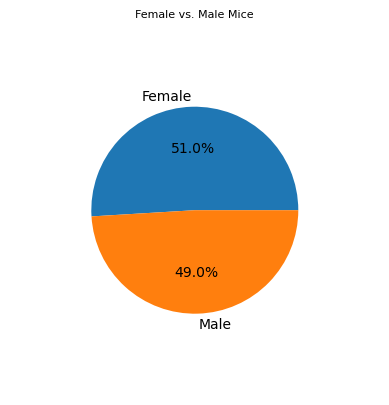

In [12]:
# Create labels
labels = ["Female", "Male"]

# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(genderCount, labels=labels, autopct="%1.1f%%", radius=0.7)
plt.title ("Female vs. Male Mice", fontsize = 8)

# Show plot
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest(max)) timepoint for each mouse
maxDF = cleanDF.groupby('Mouse ID').max()['Timepoint'].reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mergedDF = pd.merge(maxDF, cleanDF, on=('Mouse ID', 'Timepoint'), how='left')
mergedDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorVol = []

# Use loop to locate each treatment 
for treatment in treatments:
    
    # Locate the rows which contain mice on each treatment (drug) and get tumor volumes
    vol = mergedDF.loc[mergedDF["Drug Regimen"] == treatment, 'Tumor Volume (mm3)']
    
    # add subset
    tumorVol.append(vol)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = vol.loc[(vol < lower_bound) | (vol > upper_bound)]
        
    # Print results    
    print(f"{treatment} Regimen")
    print(f"Values below {round(lower_bound, 2)} could be outliers.")
    print(f"Values above {round(upper_bound, 2)} could be outliers.")
    print(f"The interquartile range of {treatment} is: {round(iqr, 2)}")
    print(f"Number of outliers for {treatment} is: {outliers.count()}")
    if outliers.count() > 0:
        for i in outliers.index:
            print(f'Outlier final tumor volume(mm3) is {round(outliers[i], 2)}')
    print('----------------------------------------------------------')

Capomulin Regimen
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.
The interquartile range of Capomulin is: 7.78
Number of outliers for Capomulin is: 0
----------------------------------------------------------
Ramicane Regimen
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
The interquartile range of Ramicane is: 9.1
Number of outliers for Ramicane is: 0
----------------------------------------------------------
Infubinol Regimen
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.
The interquartile range of Infubinol is: 11.48
Number of outliers for Infubinol is: 1
Outlier final tumor volume(mm3) is 36.32
----------------------------------------------------------
Ceftamin Regimen
Values below 25.36 could be outliers.
Values above 87.67 could be outliers.
The interquartile range of Ceftamin is: 15.58
Number of outliers for Ceftamin is: 0
----------------------------------------------------------


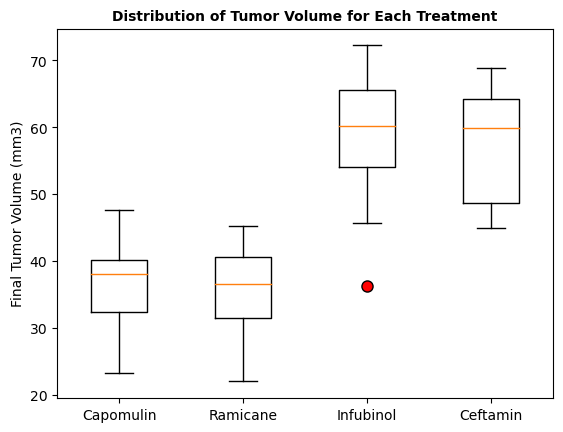

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# First, set fliers to improve readability, then create box plot
fliers = dict(marker='o', markerfacecolor='r', markersize=8)
plt.boxplot(tumorVol, flierprops=fliers)

# Add title and labels
plt.title("Distribution of Tumor Volume for Each Treatment", fontsize =10, fontweight = 'bold')
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4],['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

# Show plot
plt.show()

## Line and Scatter Plots

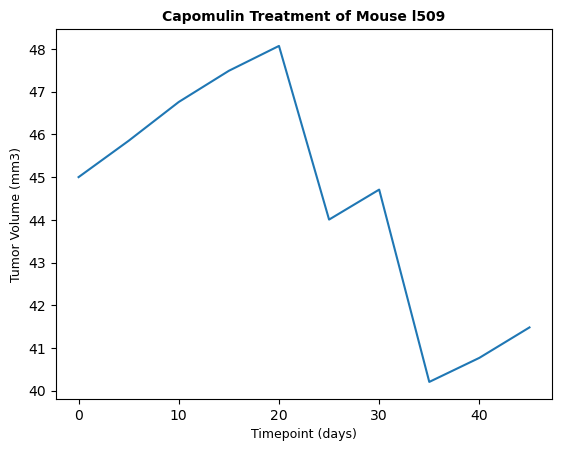

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Identify mouse treated with Capomulin
capMouse = cleanDF.loc[cleanDF['Mouse ID'] == 'l509']

# Create line plot 
plt.plot(capMouse["Timepoint"], capMouse["Tumor Volume (mm3)"])

# Add title and labels 
plt.title("Capomulin Treatment of Mouse l509", fontweight="bold", fontsize=10)
plt.xlabel("Timepoint (days)", fontsize = 9)
plt.ylabel("Tumor Volume (mm3)", fontsize = 9)

# Display plot
plt.show()

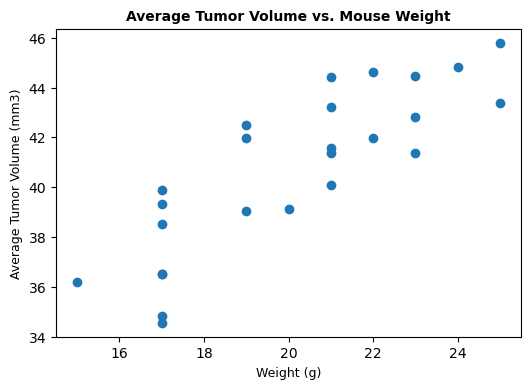

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(6, 4))

# First, isolate Capomulin regimen
cap = cleanDF.loc[cleanDF['Drug Regimen'] == 'Capomulin']

# Get mean tumor volume for each mouse ID 
meanVol = cap.groupby(['Mouse ID']).mean()
plt.scatter(meanVol['Weight (g)'], meanVol['Tumor Volume (mm3)'])

# Add title and labels
plt.title("Average Tumor Volume vs. Mouse Weight", fontsize=10, fontweight="bold")
plt.xlabel("Weight (g)", fontsize = 9)
plt.ylabel("Average Tumor Volume (mm3)", fontsize = 9)

# Display plot
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = meanVol["Weight (g)"]
avgVol = meanVol["Tumor Volume (mm3)"]
correlation = st.pearsonr(weight, avgVol)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0], 2)}.")

The correlation between mouse weight and average tumor volume is 0.84.


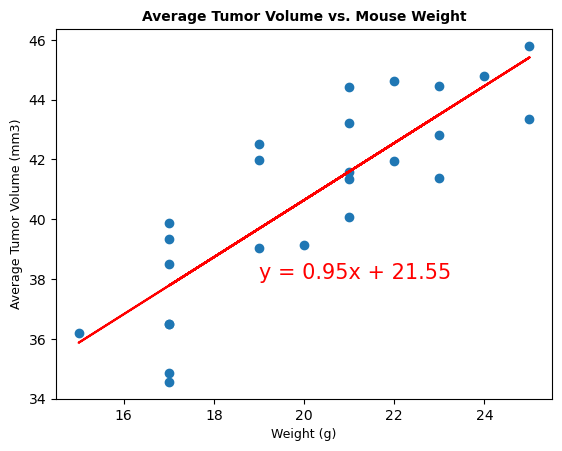

In [19]:
# Plot weight and tumor size again
plt.scatter(weight, avgVol)
plt.title("Average Tumor Volume vs. Mouse Weight", fontsize=10, fontweight="bold")
plt.xlabel("Weight (g)", fontsize = 9)
plt.ylabel("Average Tumor Volume (mm3)", fontsize = 9)

# Add linear regression calculation and line
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, avgVol)
regress_values = weight * slope + intercept
plt.plot(weight, regress_values, "r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(19,38),fontsize=15,color="red")
             
# Display plot 
plt.show()